In [1]:
import cv2 as cv
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

# Contents
- [Reading images](#read_img)  
- [Reading videos](#read_videos) 
- [Rescaling](#rescale) 
- [Changing image resolution](#resolution)
- [Drawing shapes and putting text](#drawshapes)
- [Basic OpenCV functions](#basic)  
    - [Converting to greyscale](#greyscale)
    - [Blurring](#blur)
    - [Edge cascade](#edgecascade)
    - [Dilating the image](#dilating)
    - [Eroding](#eroding)
    - [Resizing](#resize)
    - [Cropping](#crop)

<a id='read_img'></a>
### reading an image

In [29]:
img = cv.imread('Resources/Photos/cat.jpg') #method for reading images

### visualizing an image and display it as a new window (or in Jupyter notebook)

this method requires:
- name of the window
- the actual matrix of pixels to display ('img' in our case)

In [3]:
cv.imshow("Cat", img) #method for visualizing images

cv.waitKey(0) #this commands waits for a specific time for a key to be pressed (with '0'it waits for an infinite amount of time)

48

in Jupyter notebook, it is better to use matplotlib functions to visualize images within the notebook

In [4]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

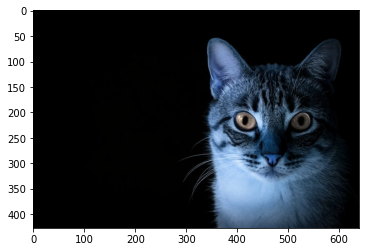

In [5]:
plt.imshow(img)

If we try to read the same image in larger size, we can see that the window is huge and hard to control and visualize.  
Opencv does not have image size management for visualization but we will se methods for rescaling and resizing.

In [6]:
img_large = cv.imread('Resources/Photos/cat_large.jpg') #reading the same image in large size

In [7]:
cv.imshow("Cat_large", img_large) #method for visualizing images

cv.waitKey(0) #this commands waits for a specific time for a key to be pressed (with '0'it waits for an infinite amount of time)

32

<a id='read_videos'></a>
# READING VIDEOS

### reading a video

VideoCapture is used for reading a video, taking as input:
- an integer value (if we are using a webcam or camera connected to our pc, usually referenced with '0', depending on how many cameras we have connected)
- or a path to a video file  
Reading videos is different from reading images: we will need to use a while loop to read the video frame by frame.  
We can then display each frame.

In [8]:
capture = cv.VideoCapture('Resources/Videos/dog.mp4') #method for reading videos

while True:
    isTrue, frame = capture.read() #command that reads the video captured by 'capture' frame by frame
    #this returns a boolean stating if the video was successfully read or not, and the actual frame that has been read
    
    cv.imshow('Video', frame) #this visualize the captured frame
    
    if cv.waitKey(20) & 0xFF == ord('d'): #this is to avoid the video to run infinitely (if 'd' is pressed, breakout the loop and stop playing the video)
        break
        
capture.release()
cv.destroyAllWindows()
        

sometimes it is possible to get a `-215: Assertion failed` error. This is due to a missing file at a specific directory, or because the video run out of frames, or because the path to the image or the video is wrong.

<a id='rescale'></a>
# RESIZING AND RESCALING

Reading files, especially video, can be computationally expensive, so resizing them we can get read of some information that we don't actually need.  
Resizing a video means changing its width and height (it is usually good practice to down-scale and not up-scale).  
We can create a function for doing that.

In [9]:
def rescaleFrame(frame, scale = 0.75):
    
    """
    Rescaling function.
    This method works for images, videos and live videos.
    """
    
    width = int(frame.shape[1] * scale) #width and height need to be integers
    height = int(frame.shape[0] * scale)
    
    dimensions = (width, height)
    
    return cv.resize(frame, dimensions, interpolation = cv.INTER_AREA) #resize to the desired dimension

If we try to integrate the rescaled frame in the previous while loop:

In [10]:
capture = cv.VideoCapture('Resources/Videos/dog.mp4') #method for reading videos

while True:
    isTrue, frame = capture.read() #command that reads the video captured by 'capture' frame by frame
    #this returns a boolean stating if the video was successfully read or not, and the actual frame that has been read
    
    #resize the frame
    frame_resized = rescaleFrame(frame, 0.2)
    
    cv.imshow('Video_resized', frame_resized) #this visualize the captured frame
    
    if cv.waitKey(20) & 0xFF == ord('d'): #this is to avoid the video to run infinitely (if 'd' is pressed, breakout the loop and stop playing the video)
        break
        
capture.release()
cv.destroyAllWindows()

The same can be applied to images

In [12]:
#img_resized = rescaleFrame(img)

#cv.imshow("Cat_resized", img_resized) 

#cv.waitKey(0)

<a id='resolution'></a>
# CHANGING IMAGE RESOLUTION

In [ ]:
def changeRes(width, height):
    """
    Function for resolution change.
    This method only works for live videos (it won't work on standalone video files).
    """
    
    capture.set(3, width) #3 stands for the property of this capture class: 3 is referenced to the width
    capture.set(4, height) #4 is referenced to the height
    
    #(e.g. if we want to modify the brightness it should be referenced to 10)

<a id='drawshapes'></a>
# DRAWING SHAPES AND PUTTING TEXT

It is possible to draw on top of an image directly modidying it or creating a dummy image.

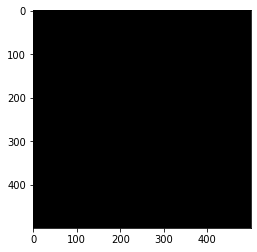

In [6]:
#dummy image
blank = np.zeros((500, 500, 3), #tuple with (height, width, no. of color channels) 
                 dtype = 'uint8') #the data type indicates that this is an image

plt.imshow(blank)

#### 1. Paint the image a certain color

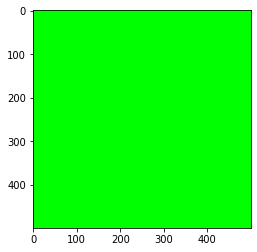

In [7]:
blank = np.zeros((500, 500, 3), dtype = 'uint8')
blank[:] = 0, 255, 0
plt.imshow(blank)

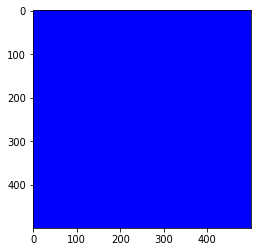

In [16]:
blank = np.zeros((500, 500, 3), dtype = 'uint8')
blank[:] = 0, 0, 255
plt.imshow(blank)

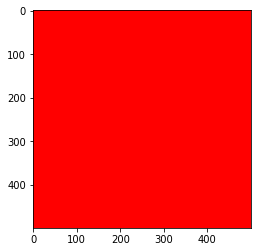

In [17]:
blank = np.zeros((500, 500, 3), dtype = 'uint8')
blank[:] = 255, 0, 0
plt.imshow(blank)

We can do the same giving only a certain range of pixels:

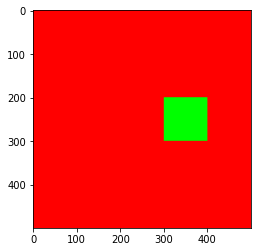

In [13]:
blank[200:300, 300:400] = 0, 255, 0
plt.imshow(blank)

#### 2. Draw a rectangle with the 'rectangle' method

The 'rectangle' method takes as inputs:
- the image on which to draw the rectangle
- pt1
- pt2
- color
- thickness
- linetype

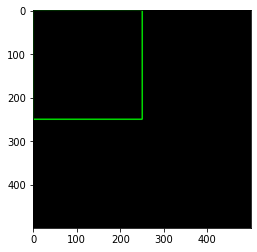

In [15]:
blank = np.zeros((500, 500, 3), dtype = 'uint8')
cv.rectangle(blank, (0,0), (250,250), (0,255,0), thickness = 2)
plt.imshow(blank)

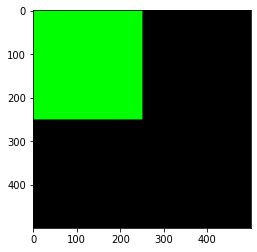

In [22]:
blank = np.zeros((500, 500, 3), dtype = 'uint8')
cv.rectangle(blank, (0,0), (250,250), (0,255,0), thickness = cv.FILLED) #cv.FILLED allows us to fill the shape (we can do the same with thickness = -1)
plt.imshow(blank)

#### 4. Drawing a circle

We can draw a circle on the image using cv.circle that takes as input:
- the image to draw onto
- the coordinates of the center
- radius
- color
- thickness

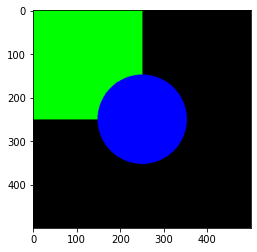

In [24]:
cv.circle(blank, (blank.shape[0]//2, blank.shape[1]//2), 100, (0,0,255), thickness = -1)
plt.imshow(blank)

#### 5. Drawing a line

This is done using the cv.line method that takes as input:
- the image to draw onto
- coordinates of pt1
- coordinates of pt2
- color
- thickness

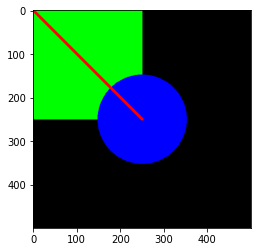

In [26]:
cv.line(blank, (0,0), (blank.shape[0]//2, blank.shape[1]//2), (255,0,0), thickness = 5)
plt.imshow(blank)

#### 6. Writing text on an image

cv.putText takes as input:
- the image on which writing the text
- text
- origin
- font
- font scale
- color
- thickness

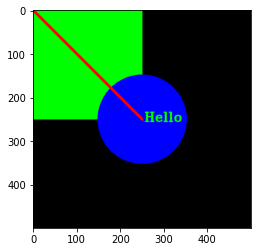

In [27]:
cv.putText(blank, "Hello", (255, 255), cv.FONT_HERSHEY_TRIPLEX, 1.0, (0,255,0), 2)
plt.imshow(blank)

<a id='basic'></a>
# BASIC FUNCTIONS

<a id='greyscale'></a>
#### 1. Converting to greyscale  
We use cv.cvtColor which is a function that operates on the image's color channels and requires:
- the image to modify
- a color code (in this case cv.COLOR_BGR2GRAY)

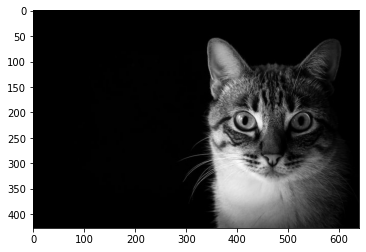

In [41]:
img = cv.imread('Resources/Photos/cat.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray') #for matplotlib it is necessary to set the color map to 'gray' to visualize the greyscale image correctly

<a id='blur'></a>
#### 2. Blurring 
Blurring means increasing some of the noise in an image. There are several blurring techniques, this is the Gaussian blur.  
cv.GaussianBlur takes as inputs:
- the source img
- the kernel size (a tuple with 2 elements) that the method uses as a window size to compute the blur on the image (it has to be an odd number)
- cv.BORDER_DEFAULT

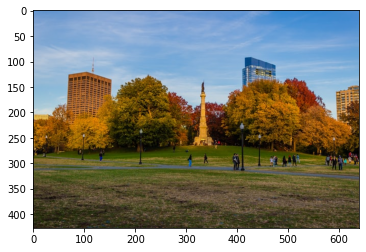

In [25]:
img = cv.imread('Resources/Photos/park.jpg')

img = cv.cvtColor(img, cv.COLOR_BGR2RGB) #converting from rgb to gbr image
plt.imshow(img)

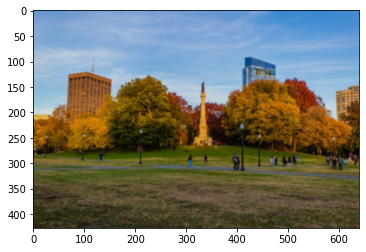

In [26]:
blur = cv.GaussianBlur(img, (3,3), cv.BORDER_DEFAULT)
plt.imshow(blur)

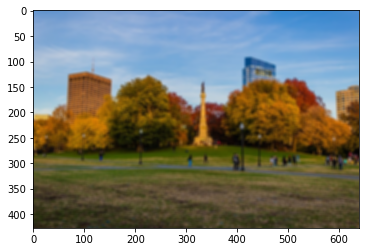

In [27]:
#to increase the blur
blur = cv.GaussianBlur(img, (7,7), cv.BORDER_DEFAULT)
plt.imshow(blur)

<a id='edgecascade'></a>
#### 3. Edge cascade 
There are many edge cascade methods available, here we see the cv.Canny which requires:
- source img
- threshold1 value
- threshold2 value

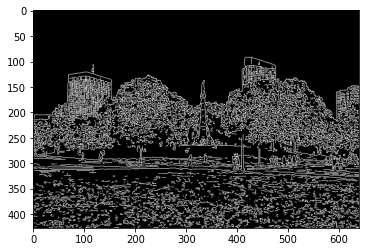

In [29]:
canny = cv.Canny(img, 125, 175)
plt.imshow(canny, cmap='gray')

We can combine blur and edge cascade to reduce the number of edges:

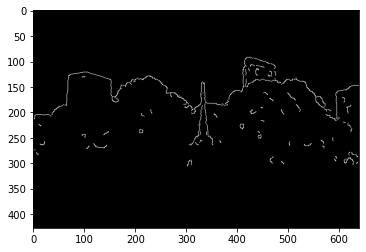

In [30]:
#combination of canny and blur to reduce the number of edges
canny = cv.Canny(blur, 125, 175)
plt.imshow(canny, cmap='gray')

<a id='dilating'></a>
#### 4. Dilating the image 
We can use cv.dilate which requires:
- structural element (the canny image in our case)
- kernel size
- iterations

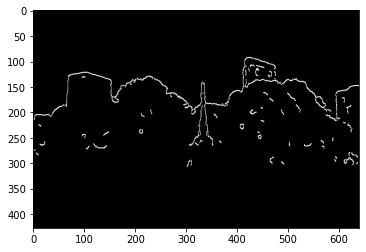

In [34]:
dilated = cv.dilate(canny, (3,3), iterations=1)
plt.imshow(dilated, cmap='gray')

Increasing the thickness of the edges can be done with more iterations:

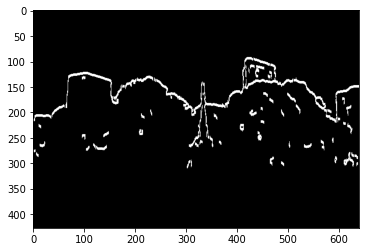

In [36]:
#trying to increase the number of iterations we can make the edges thicker
dilated = cv.dilate(canny, (3,3), iterations=4)
plt.imshow(dilated, cmap='gray')

<a id='eroding'></a>
#### 5. Eroding 
This is done to call back the structuring element of a dilated image.  
This does not work in the 100% of cases, but often can get a decent job done.
- the dilated image
- kernel size
- iterations

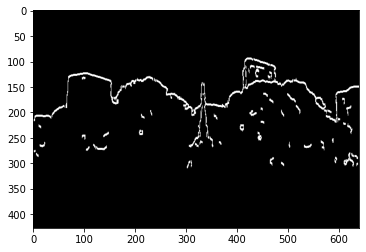

In [37]:
eroded = cv.erode(dilated, (3,3), iterations=1)
plt.imshow(eroded, cmap='gray')

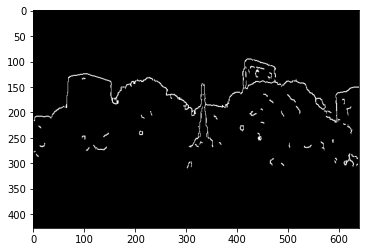

In [39]:
eroded = cv.erode(dilated, (3,3), iterations=3) #in this case we match the parameters and hopefully we will get the same structuring element back
plt.imshow(eroded, cmap='gray')

<a id='resize'></a>
#### 6. Resizing
We can use cv.resize which requires:
- the img to resize
- destination size  
- interpolation (cv.INTER_AREA is useful if we are shrinking the image, otherwise for enlarging it cv.INTER_LINEAR or cv.INTER_CUBIC can be used. The latter is slower but produces a better result)  
  
This method **ignores the aspect ratio**

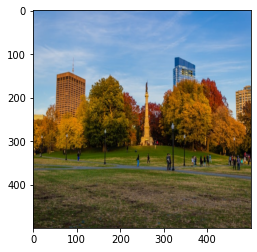

In [42]:
resized = cv.resize(img, (500,500), interpolation = cv.INTER_AREA)
plt.imshow(resized)

<a id='crop'></a>
#### 7. Cropping
Since the images are arrays, we can do some array slicing

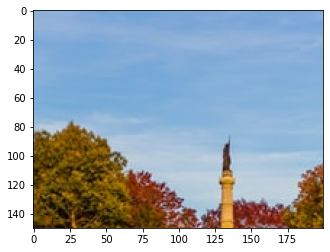

In [44]:
cropped = img[50:200, 200:400]
plt.imshow(cropped)

where we crop the portion of the image highlighted below with the rectangle function:

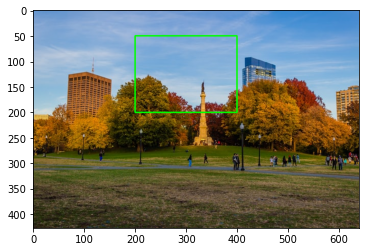

In [50]:
img2 = img.copy()
cv.rectangle(img2, (200,50), (400,200), (0,255,0), thickness = 2)
plt.imshow(img2)